# Daibetes Prediction

#### This model predict whether a person has diabetes or not.
#### Dataset : https://www.kaggle.com/johndasilva/diabetes
##### Dataset of diabetes, taken from the hospital Frankfurt, Germany

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
df = pd.read_csv('kaggle_diabetes.csv')

## View the dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2000, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                   

In [7]:
#return basic statistics information of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


### Null values

In [8]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

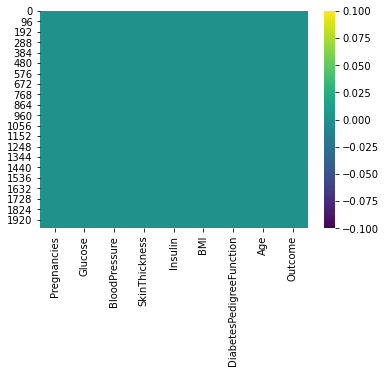

In [9]:
sns.heatmap(df.isnull(),cmap='viridis')

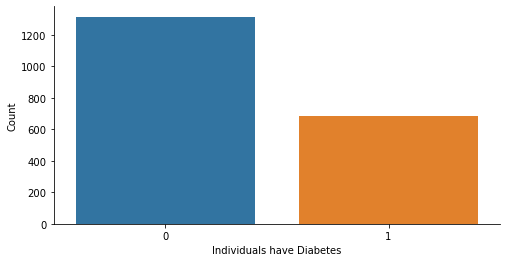

In [10]:
#plotting outcomes based on the number of datsets entries
plt.figure(figsize=(8,4)) #set the size of plot
sns.countplot(x='Outcome', data=df)

# remove border line(spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Heading
plt.xlabel('Individuals have Diabetes')
plt.ylabel('Count')

plt.show()

## Data Cleaning

In [11]:
#Replacing the 0 value[''Glucose','BloodPressure','SkinThickness','Insulin','BMI''] by NaN, 
# so we can find null values from data and replace with mean
# first we make copy of our data
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [13]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [14]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


## Model Building

In [16]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='Outcome')
y=df['Outcome']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#https://www.youtube.com/watch?v=nmBqnKSSKfM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Hyperparameter Tuning

In [18]:
#Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
# create the function to find best model for data
def best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C':  [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators':  [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

best_model(X_train, y_train)
    

,model,best_parameters,score
0,logistic_regression,{'C': 7},0.763125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.904375
2,random_forest,{'n_estimators': 52},0.951250
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.869375


In [20]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Model Evaluation

#### Test Data

In [21]:
# creating confusion matrix
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,related%20terminology%20can%20be%20confusing.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #(metrics)
y_predict= classifier.predict(X_test) 
cm = confusion_matrix(y_test,y_predict)
cm

array([[272,   0],
       [  5, 123]], dtype=int64)

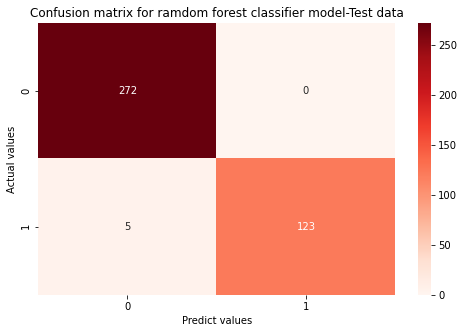

In [22]:
#plotting the confution matrix with heat map
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.figure(figsize=(8,5))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for ramdom forest classifier model-Test data')
plt.ylabel('Actual values')
plt.xlabel('Predict values')
plt.show()

In [23]:
# Accuracy Score
score = round(accuracy_score(y_test, y_predict),4)*100
score

98.75

#### Train data

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #(metrics)
y_predict_train= classifier.predict(X_train) 
cm2 = confusion_matrix(y_train,y_predict_train)
cm2

array([[1044,    0],
       [   1,  555]], dtype=int64)

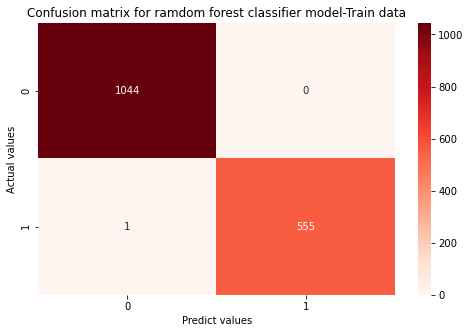

In [25]:
plt.figure(figsize=(8,5))
p = sns.heatmap(cm2, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for ramdom forest classifier model-Train data')
plt.ylabel('Actual values')
plt.xlabel('Predict values')
plt.show()

In [26]:
# Accuracy Score of train data
score = round(accuracy_score(y_train, y_predict_train),4)*100
score

99.94

## Predictions

In [27]:
def predictions(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    pre = int(Pregnancies)
    glu = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    ins = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)
    
    x = [[pre, glu, bp, st, ins, bmi, dpf, age]]
    x = sc.transform(x)
    
    return classifier.predict(x)

#### Prediction 1

In [28]:
pre = predictions(2, 125, 92, 45, 240, 43.5, 0.47, 85)[0]
if pre:
  print('Take Care!!, You have diabetes.')
else:
  print("Keep it up!!, You don't have diabetes.")

Take Care!!, You have diabetes.


#### Prediction 2

In [33]:
pre = predictions(0, 111, 82, 35, 260, 21.1, 0.303, 22)[0]
if pre:
  print('Take Care!!, You have diabetes.')
else:
  print("Keep it up!!, You don't have diabetes.")

Keep it up!!, You don't have diabetes.


#### Prediction 3

In [34]:
pre = predictions(1, 102, 72, 55, 240, 37.1, 0.477, 15)[0]
if pre:
  print('Take Care!!, You have diabetes.')
else:
  print("Keep it up!!, You don't have diabetes.")

Keep it up!!, You don't have diabetes.


## Pickle

In [35]:
#import pickle
#file = open('Diabetes_Prediction.pkl', 'wb')
#pickle.dump(classifier, file)